In [55]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


DATASET 

In [56]:
import pandas as pd
url='/content/gdrive/MyDrive/Hate_speech-acm/hate_speech.csv'

In [57]:

import os, shutil
import pandas as pd
dataset=pd.read_csv(url,names=['tweet','class'])
dataset

,tweet,class
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,no
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,no
2,Doctor sab sahi me ke PhD (in hate politics) ...,no
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,no
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,yes
...,...,...
4574,ye attankwadi Indian agent hai jo terrorism ph...,no
4575,bola na terrorism ko support karna band karoge...,no
4576,lagta hai aap ne movie dekhi hai which is writ...,no
4577,tum log terrorism ko support karna band kardo ...,no


In [58]:
dataset.dropna(subset = ["tweet"], inplace=True)
dataset["class"].describe()

count     4578
unique       4
top         no
freq      2914
Name: class, dtype: object

In [59]:
dataset["class"]=dataset["class"].replace(to_replace =['n','on'], value ='no')
pd.unique(dataset["class"])

array(['no', 'yes'], dtype=object)

In [60]:
# Adding text-length as a field in the dataset
dataset['text length'] = dataset['tweet'].apply(len)
print(dataset.head())

                                               tweet class  text length
0  Knowing ki Vikas kitna samjhata hai Priyanka a...    no          126
1  I am Muhajir .. Aur mere lye sab se Pehly Paki...    no          196
2  Doctor  sab sahi me ke PhD (in hate politics) ...    no          166
3  Poore Desh me Patel OBC me aate Hain sirf gujr...    no          257
4  Sarkar banne ke bad Hindu hit me ek bhi faisla...   yes          140


DATA VISUALIZATION

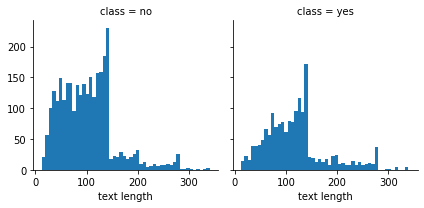

In [61]:
#Basic visualization of data using histograms
# FacetGrid- Multi-plot grid for plotting conditional relationships
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=dataset, col='class')
graph.map(plt.hist, 'text length', bins=50)

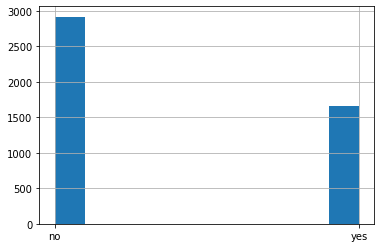

In [62]:
dataset['class'].hist()

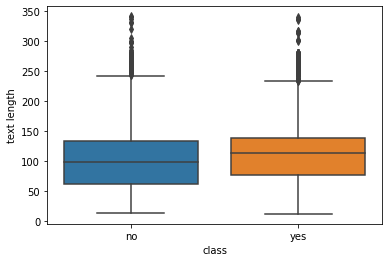

In [63]:
# Box-plot visvualization
sns.boxplot(x='class', y='text length', data=dataset)

DATASET PREPROCESSING

In [64]:
dataset["class"]=dataset["class"].replace(to_replace =['no'], value =0)
dataset["class"]=dataset["class"].replace(to_replace =['yes'], value =1)

In [65]:
 
train = dataset.iloc[:3843,:-1] 
test = dataset.iloc[3843:,:-1] 

In [66]:
train[train['class'] == 0].head(10)

,tweet,class
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,0
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,0
2,Doctor sab sahi me ke PhD (in hate politics) ...,0
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,0
6,Ek dil ek jaan akal ke imitihaan kal KP ke rap...,0
9,I am very sorry to say saaf dil shilpa ke fans...,0
10,"Madam,Bahut sochsamajhkr Mai ESS tarq pe purey...",0
12,"Ha rem """" emoji I hate this emoji! Mujhe nagi...",0
14,Sir apki fav kon hai iss seasn mai??,0
15,Mehanat to school me copy karke likhne me b la...,0


In [67]:
train[train['class'] == 1].head(10)

,tweet,class
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,1
5,Hate it jab test ata ho phr bh acha na ho -.-,1
7,Aise logo se sakht nafrat karta hu Jo caste ko...,1
8,"Sir, jyada sentimental mat ho jao peene ke baa...",1
11,I hate sapna yaar Coz khud ko toh chalana aati...,1
13,Hate heena..... too much irritating n bat karn...,1
19,"Code phatta hai toh phatne do, Mujhe project s...",1
20,Arsi bahar jani chahiye.... I hate arsi khan,1
22,"Karachi say agencies panjabi, pathano ko qatal...",1
27,Haa bhai. Ye chutiye log ki hatred apni liye m...,1


In [68]:
train.shape, test.shape

((3843, 2), (735, 2))

In [69]:
train["class"].value_counts()

0    2478
1    1365
Name: class, dtype: int64

In [70]:
combi = train.append(test, ignore_index=True, sort=True)
combi.shape

(4578, 2)

1. Removing Twitter Handles (@user)

In [71]:
import numpy as np
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head(10)

,class,tweet,tidy_tweet
0,0,Knowing ki Vikas kitna samjhata hai Priyanka a...,Knowing ki Vikas kitna samjhata hai Priyanka a...
1,0,I am Muhajir .. Aur mere lye sab se Pehly Paki...,I am Muhajir .. Aur mere lye sab se Pehly Paki...
2,0,Doctor sab sahi me ke PhD (in hate politics) ...,Doctor sab sahi me ke PhD (in hate politics) ...
3,0,Poore Desh me Patel OBC me aate Hain sirf gujr...,Poore Desh me Patel OBC me aate Hain sirf gujr...
4,1,Sarkar banne ke bad Hindu hit me ek bhi faisla...,Sarkar banne ke bad Hindu hit me ek bhi faisla...
5,1,Hate it jab test ata ho phr bh acha na ho -.-,Hate it jab test ata ho phr bh acha na ho -.-
6,0,Ek dil ek jaan akal ke imitihaan kal KP ke rap...,Ek dil ek jaan akal ke imitihaan kal KP ke rap...
7,1,Aise logo se sakht nafrat karta hu Jo caste ko...,Aise logo se sakht nafrat karta hu Jo caste ko...
8,1,"Sir, jyada sentimental mat ho jao peene ke baa...","Sir, jyada sentimental mat ho jao peene ke baa..."
9,0,I am very sorry to say saaf dil shilpa ke fans...,I am very sorry to say saaf dil shilpa ke fans...


2. Removing Punctuations, Numbers, and Special Characters

In [72]:
combi.tidy_tweet = combi.tidy_tweet.str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,class,tweet,tidy_tweet
0,0,Knowing ki Vikas kitna samjhata hai Priyanka a...,Knowing ki Vikas kitna samjhata hai Priyanka a...
1,0,I am Muhajir .. Aur mere lye sab se Pehly Paki...,I am Muhajir Aur mere lye sab se Pehly Paki...
2,0,Doctor sab sahi me ke PhD (in hate politics) ...,Doctor sab sahi me ke PhD in hate politics ...
3,0,Poore Desh me Patel OBC me aate Hain sirf gujr...,Poore Desh me Patel OBC me aate Hain sirf gujr...
4,1,Sarkar banne ke bad Hindu hit me ek bhi faisla...,Sarkar banne ke bad Hindu hit me ek bhi faisla...
5,1,Hate it jab test ata ho phr bh acha na ho -.-,Hate it jab test ata ho phr bh acha na ho
6,0,Ek dil ek jaan akal ke imitihaan kal KP ke rap...,Ek dil ek jaan akal ke imitihaan kal KP ke rap...
7,1,Aise logo se sakht nafrat karta hu Jo caste ko...,Aise logo se sakht nafrat karta hu Jo caste ko...
8,1,"Sir, jyada sentimental mat ho jao peene ke baa...",Sir jyada sentimental mat ho jao peene ke baa...
9,0,I am very sorry to say saaf dil shilpa ke fans...,I am very sorry to say saaf dil shilpa ke fans...


3. Removing Short Words

In [73]:
combi.tidy_tweet = combi.tidy_tweet.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
combi.head(10)

,class,tweet,tidy_tweet
0,0,Knowing ki Vikas kitna samjhata hai Priyanka a...,Knowing Vikas kitna samjhata Priyanka Itch Gua...
1,0,I am Muhajir .. Aur mere lye sab se Pehly Paki...,Muhajir mere Pehly Pakistan lakh Altaf Jese le...
2,0,Doctor sab sahi me ke PhD (in hate politics) ...,Doctor sahi hate politics wale Bhai padhe likh...
3,0,Poore Desh me Patel OBC me aate Hain sirf gujr...,Poore Desh Patel aate Hain sirf gujrat chor ma...
4,1,Sarkar banne ke bad Hindu hit me ek bhi faisla...,Sarkar banne Hindu faisla dwara liya gaya goba...
5,1,Hate it jab test ata ho phr bh acha na ho -.-,Hate test acha
6,0,Ek dil ek jaan akal ke imitihaan kal KP ke rap...,jaan akal imitihaan rape sawing between legs a...
7,1,Aise logo se sakht nafrat karta hu Jo caste ko...,Aise logo sakht nafrat karta caste naam sath c...
8,1,"Sir, jyada sentimental mat ho jao peene ke baa...",jyada sentimental peene baad Jiss desh buniyad...
9,0,I am very sorry to say saaf dil shilpa ke fans...,very sorry saaf shilpa fans hiten mein samjhte...


4. Text Normalization

In [74]:
tokenized_tweet = combi.tidy_tweet.apply(lambda x: x.split())
tokenized_tweet.head()

0    [Knowing, Vikas, kitna, samjhata, Priyanka, It...
1    [Muhajir, mere, Pehly, Pakistan, lakh, Altaf, ...
2    [Doctor, sahi, hate, politics, wale, Bhai, pad...
3    [Poore, Desh, Patel, aate, Hain, sirf, gujrat,...
4    [Sarkar, banne, Hindu, faisla, dwara, liya, ga...
Name: tidy_tweet, dtype: object

In [75]:
# Now we can normalize the tokenized tweets.

from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [know, vika, kitna, samjhata, priyanka, itch, ...
1    [muhajir, mere, pehli, pakistan, lakh, altaf, ...
2    [doctor, sahi, hate, polit, wale, bhai, padh, ...
3    [poor, desh, patel, aat, hain, sirf, gujrat, c...
4    [sarkar, bann, hindu, faisla, dwara, liya, gay...
Name: tidy_tweet, dtype: object

In [76]:
# Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet
combi.head(10)

,class,tweet,tidy_tweet
0,0,Knowing ki Vikas kitna samjhata hai Priyanka a...,know vika kitna samjhata priyanka itch guard u...
1,0,I am Muhajir .. Aur mere lye sab se Pehly Paki...,muhajir mere pehli pakistan lakh altaf jese le...
2,0,Doctor sab sahi me ke PhD (in hate politics) ...,doctor sahi hate polit wale bhai padh likh baa...
3,0,Poore Desh me Patel OBC me aate Hain sirf gujr...,poor desh patel aat hain sirf gujrat chor manu...
4,1,Sarkar banne ke bad Hindu hit me ek bhi faisla...,sarkar bann hindu faisla dwara liya gaya gobar...
5,1,Hate it jab test ata ho phr bh acha na ho -.-,hate test acha
6,0,Ek dil ek jaan akal ke imitihaan kal KP ke rap...,jaan akal imitihaan rape saw between leg after...
7,1,Aise logo se sakht nafrat karta hu Jo caste ko...,ais logo sakht nafrat karta cast naam sath cha...
8,1,"Sir, jyada sentimental mat ho jao peene ke baa...",jyada sentiment peen baad jiss desh buniyad si...
9,0,I am very sorry to say saaf dil shilpa ke fans...,veri sorri saaf shilpa fan hiten mein samjht h...


 Understanding the common words used in the tweets: WordCloud

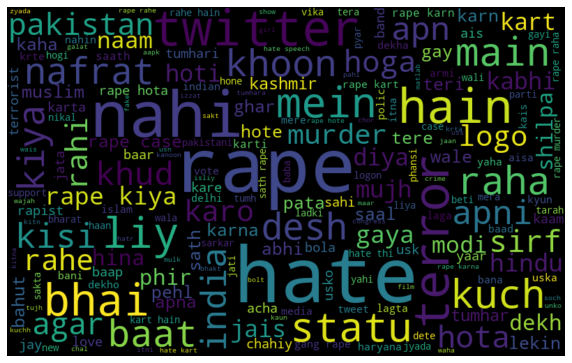

In [77]:
all_words = ' '.join([text for text in combi['tidy_tweet']]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

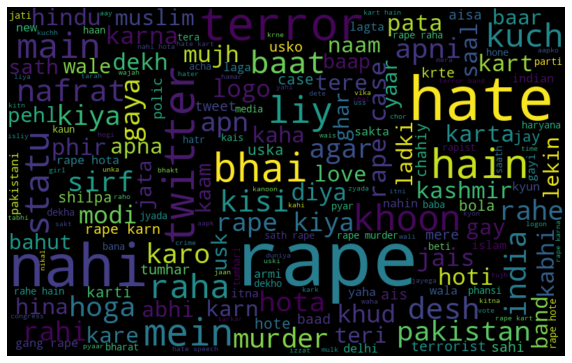

In [78]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['class'] == 0]]) 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

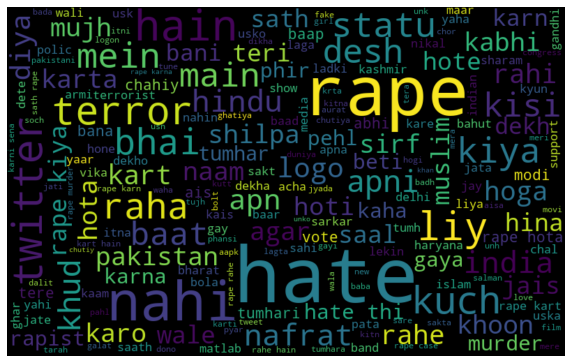

In [79]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['class'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

FEATURE EXTRACTION

1.1 BOW Features




In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(4578, 1000)

1.2 TFIDF Features

In [81]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(4578, 1000)

1.3 Word2Vec Features

In [88]:

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(779495, 1074180)

In [89]:
model_w2v.wv.most_similar(positive="hate")

[('cheap', 0.7317132949829102),
 ('trend', 0.7143368124961853),
 ('watch', 0.7138314247131348),
 ('go', 0.7073869705200195),
 ('here', 0.7025694847106934),
 ('lover', 0.6957378387451172),
 ('anpadh', 0.6928683519363403),
 ('sabji', 0.6901342272758484),
 ('shika', 0.6891623735427856),
 ('fall', 0.6883848905563354)]

In [90]:

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [91]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


(4578, 200)

In [35]:
wordvec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.130124,0.044919,0.068005,-0.262381,0.020714,0.063017,0.157979,0.204378,0.335025,0.015218,0.054453,0.118454,-0.224952,0.205848,-0.313026,0.215834,-0.047671,0.136709,-0.054005,0.230212,-0.032079,-0.081733,-0.238132,-0.152370,-0.012189,-0.305812,0.281128,0.148889,0.234854,-0.145237,0.301531,0.085936,0.149102,-0.179994,0.029137,0.059992,0.080916,-0.027528,0.142607,0.224168,...,-0.096333,-0.033521,0.097041,0.124778,0.115257,0.010350,-0.158113,0.047186,0.138542,0.133545,0.000203,0.038797,0.041131,0.218096,0.001131,-0.106836,-0.057526,-0.053025,0.063064,-0.280564,-0.083580,-0.044311,0.093644,0.134076,-0.118559,0.006995,0.097091,0.186353,0.054409,-0.026714,-0.052016,0.113036,-0.072382,0.169203,0.157392,0.257145,0.009426,-0.197838,-0.073569,-0.170316
1,-0.149953,-0.099356,0.035025,-0.070672,0.021654,0.048256,0.120120,0.169808,0.187828,-0.074961,-0.075907,0.131339,-0.110656,0.196131,-0.120737,0.065661,0.049907,0.012180,0.031682,0.091963,-0.175737,0.065597,-0.084262,-0.074195,-0.085132,-0.196723,0.172688,-0.100132,0.132715,-0.071447,0.088978,0.064281,0.000977,-0.137144,-0.018205,0.160829,-0.103523,-0.013874,0.098372,0.081988,...,-0.116609,-0.144322,0.159118,0.025164,-0.162297,0.065181,0.007016,0.116054,0.100518,0.023922,-0.004485,0.161353,0.187814,0.383423,-0.041232,0.059794,0.006699,0.010424,0.047202,-0.230209,-0.192267,-0.076443,-0.034075,0.081514,0.040070,0.042995,0.197408,0.198969,0.077160,0.050997,-0.046172,0.009452,0.126380,0.165247,0.096450,0.264241,0.054550,-0.171212,-0.147571,0.005014
2,-0.201332,0.072522,0.012391,-0.208402,-0.032405,0.060902,0.136889,0.217029,0.307568,0.017537,-0.203793,-0.032947,-0.256463,0.185455,-0.252209,0.074236,0.067151,0.028227,0.055638,-0.008084,-0.050120,0.018918,-0.219873,-0.100801,-0.090078,-0.277785,0.121032,-0.011034,0.206712,-0.054632,0.204215,0.109478,0.064264,-0.113415,0.122490,0.128819,-0.010421,-0.048984,0.066254,0.055088,...,-0.189637,-0.108055,0.017189,0.175851,-0.055769,-0.066533,-0.117579,0.121282,-0.064194,0.108367,-0.018761,0.336565,0.092662,0.194896,0.022715,0.121347,-0.088783,0.023462,0.025998,-0.289548,-0.190453,-0.154656,-0.085951,0.128041,0.037284,-0.080117,0.031122,0.050763,-0.039109,0.127795,0.000669,0.101973,-0.026489,0.146783,0.174995,0.231691,-0.037290,-0.231581,-0.164443,-0.081654
3,-0.256992,0.098280,0.003502,-0.199897,-0.036072,0.029475,0.154231,0.013948,0.360483,0.066249,-0.217743,0.084671,-0.123255,0.091417,-0.175048,0.059657,-0.033841,0.073033,0.163323,0.080225,-0.134687,-0.016925,-0.106425,-0.079021,-0.023035,-0.130771,0.070314,-0.094663,0.126421,-0.107712,0.146949,-0.053331,-0.020355,-0.056884,0.056116,0.178124,-0.128350,-0.091007,0.113538,0.057329,...,-0.195432,-0.141658,-0.031872,0.187567,-0.269488,-0.091506,-0.083543,0.104203,0.022863,0.015423,-0.042426,0.304370,0.229223,0.225506,-0.016301,0.029146,-0.042230,0.028025,0.080331,-0.105171,-0.205990,-0.073331,-0.101892,0.181433,0.069573,-0.063589,0.013499,0.059787,-0.010055,0.131495,-0.080551,0.019085,-0.002738,0.150620,0.208168,0.154630,-0.031987,-0.195417,-0.175537,-0.016440
4,-0.361760,-0.002535,-0.007992,-0.172299,-0.079528,0.087792,0.135225,0.184268,0.385008,-0.036668,-0.321406,0.001053,-0.264038,0.138734,-0.151483,0.113253,0.009400,0.003496,0.131078,0.085098,-0.075163,0.054550,0.051671,-0.045474,0.020696,-0.281357,0.170243,-0.006672,0.099349,-0.082760,0.127295,0.102477,0.027656,-0.171160,0.024128,0.189779,-0.093840,-0.148964,0.064693,0.055596,...,-0.236392,-0.141944,0.073571,0.195616,-0.207876,-0.046482,-0.094918,0.095667,0.054728,0.046361,0.040810,0.204971,0.119980,0.333164,0.015534,0.183648,-0.031497,0.068003,0.158681,-0.202287,-0.158956,-0.015244,-0.080016,0.135100,-0.026689,-0.046945,0.133991,0.179051,0.020724,0.067471,-0.054743,0.01276

1.4 Doc2Vec Features

In [36]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [37]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


In [38]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm_mean = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 5.                                  
                                  workers=32, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23, # for reproducibility
                                 ) 

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

100%|██████████| 4578/4578 [00:00<00:00, 1891775.74it/s]


In [39]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(4578, 200)

In [40]:
docvec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,0.059102,0.034043,-0.072923,-0.068092,0.068282,0.036589,0.103562,-0.065752,-0.199211,-0.063345,0.065739,-0.030804,-0.115711,0.081842,0.012586,-0.016498,0.113551,0.085678,0.100144,0.006076,0.019858,0.040796,-0.081722,-0.067406,0.066640,0.017120,0.050201,0.024948,0.089243,0.254551,-0.044848,0.280348,0.062259,0.156004,-0.027178,-0.054198,0.001759,-0.065026,0.155494,-0.108123,...,-0.043781,-0.063435,-0.210199,-0.226521,0.091842,-0.037870,0.089984,-0.106154,0.097259,0.016677,0.042228,0.099836,0.199904,0.046227,-0.036723,0.100752,0.091799,-0.033863,-0.053874,-0.107735,-0.173160,0.035582,0.020608,0.074224,-0.066286,0.130328,0.120051,0.091738,0.010471,-0.382064,-0.087514,-0.023270,-0.010254,0.081042,-0.021423,0.042893,-0.118831,-0.040126,-0.039170,0.074208
1,-0.114435,0.187538,0.034645,-0.220657,0.098328,0.096440,0.041522,-0.028453,-0.136392,0.015906,-0.021450,-0.002600,0.134675,0.057195,0.044013,-0.132695,0.016995,0.103662,-0.053944,0.043890,0.067215,0.123819,-0.080403,-0.194979,0.032458,0.244363,-0.013949,-0.035484,0.031787,0.037595,0.191826,0.044803,-0.103566,-0.152609,0.118102,0.079929,-0.048805,0.118703,-0.047475,-0.089726,...,-0.060256,0.014166,-0.160103,0.012288,0.064254,0.081350,-0.017204,0.019392,-0.065220,0.056597,-0.055179,-0.006651,-0.028426,0.001430,0.074020,0.174600,0.025734,-0.008036,-0.147776,-0.029447,-0.010693,-0.002923,-0.023713,0.093469,-0.059802,0.035951,-0.012657,0.153892,0.030521,-0.044624,0.103524,0.010602,0.069054,0.014372,-0.016603,-0.056052,-0.182722,-0.053130,0.060723,0.122274
2,0.026988,0.185523,0.038471,-0.093089,-0.012761,0.051795,0.007529,-0.034639,-0.059832,-0.081306,-0.072143,-0.072332,0.089794,0.024943,-0.035376,0.015007,-0.136777,-0.040024,0.057067,0.016557,0.074524,0.133191,-0.031207,0.071361,-0.030930,-0.062545,0.085268,0.108519,0.109525,0.051583,-0.028319,0.056656,-0.037725,0.070886,0.025357,-0.102261,-0.141465,-0.213650,-0.006344,-0.019940,...,-0.048601,-0.094898,-0.117899,-0.016630,-0.037319,-0.121296,0.041884,-0.095712,0.099447,0.045337,-0.163093,-0.038241,0.086982,0.007915,0.056738,0.029102,0.061005,-0.051292,-0.158081,-0.124893,0.183332,0.049866,0.085336,0.015486,-0.042184,-0.020280,-0.100292,0.121816,-0.030234,0.003036,-0.078109,0.153904,0.015564,0.012936,0.042954,-0.101911,0.097962,0.084886,-0.106808,0.120671
3,-0.006234,0.142339,0.140967,-0.079637,-0.047380,-0.026123,-0.047038,-0.029873,0.046632,0.091883,-0.013987,0.011663,-0.031161,0.030121,-0.129183,-0.106315,-0.194263,-0.073519,0.033218,0.034978,0.068291,0.095594,0.106418,0.105087,-0.056565,0.073146,0.197654,0.142118,0.143244,-0.085478,0.103521,-0.107874,-0.053504,0.078009,-0.034916,-0.105912,-0.076643,-0.128666,0.040306,0.025335,...,0.011988,-0.105866,-0.130392,-0.121896,-0.053793,-0.097023,-0.081969,-0.092201,0.072222,0.036443,-0.091730,-0.013459,-0.066039,-0.003044,0.130779,-0.061366,0.032053,-0.072644,-0.255849,-0.026657,0.295986,0.089797,-0.010098,-0.084342,-0.033861,-0.125079,-0.131810,0.179698,-0.123140,0.103948,0.027215,0.209321,0.017632,0.127284,0.058662,-0.106769,0.106626,0.006089,-0.003643,-0.064970
4,0.003861,0.023452,0.065168,-0.163338,-0.159757,0.097275,0.031045,0.081976,-0.102923,0.023004,-0.189414,-0.023565,-0.173729,0.130603,-0.023668,0.038874,-0.013695,0.120148,-0.098421,0.017679,0.107063,0.012333,-0.014966,0.000804,0.111678,-0.127572,0.081851,0.082189,0.118859,-0.022954,-0.040317,0.148126,-0.072285,0.197811,0.016602,-0.081751,0.024969,-0.120977,0.092893,-0.145076,...,-0.019581,0.041782,-0.081061,0.013403,-0.001906,-0.085985,-0.071992,-0.052918,-0.003382,-0.030425,-0.067602,-0.114331,0.035754,0.108986,0.111382,0.114211,0.000060,-0.035206,0.062344,-0.054935,0.015048,0.032625,-0.008763,0.121397,0.114476,-0.136486,0.124158,0.175426,0.024460,0.006127

1.5 Fasttext Features

SPLITTING DATA INTO train and test

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix, accuracy_score

BOW

In [83]:
# Extracting train and test BoW features 
train_bow = bow[:3843,:] 
test_bow = bow[3843:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['class'], random_state=42, test_size=0.2)


TF-IDF

In [84]:
train_tfidf = tfidf[:3843,:]
test_tfidf = tfidf[3843:,:] 

# splitting data into training and validation set 
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, train['class'], random_state=42, test_size=0.2)


Word2vec

In [92]:

train_w2v = wordvec_df.iloc[:3843,:]
test_w2v = wordvec_df.iloc[3843:,:]

# splitting data into training and validation set 
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, train['class'], random_state=42, test_size=0.2)

In [94]:
type(xtrain_w2v)

pandas.core.frame.DataFrame

DOC2vec

In [45]:
train_d2v = docvec_df.iloc[:3843,:]
test_d2v = docvec_df.iloc[3843:,:] 

# splitting data into training and validation set 
xtrain_d2v, xvalid_d2v, ytrain, yvalid = train_test_split(train_d2v, train['class'], random_state=42, test_size=0.2)


Fasttext

MODEL TRAINING

1.1 SVM-RBF (word2vec)

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='rbf').fit(xtrain_w2v, ytrain) 
prediction = svc.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM-RBF(word2vec), Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.64      0.98      0.78       484
           1       0.66      0.08      0.14       285

    accuracy                           0.64       769
   macro avg       0.65      0.53      0.46       769
weighted avg       0.65      0.64      0.54       769

SVM-RBF(word2vec), Accuracy Score: 0.6436931079323797


HyperParameter Tunning using Grid Search 

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1,10,100], 'kernel': ['linear','rbf']}]
grid_search = GridSearchCV(estimator= svc,
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(xtrain_w2v, ytrain)
print(grid_search.best_params_)
prediction = grid_search.predict(xvalid_w2v)  

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM(word2vec) after HT+GD, Accuracy Score:",acc1)

{'C': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.64      0.98      0.78       484
           1       0.66      0.08      0.14       285

    accuracy                           0.64       769
   macro avg       0.65      0.53      0.46       769
weighted avg       0.65      0.64      0.54       769

SVM(word2vec) after HT+GD, Accuracy Score: 0.6436931079323797


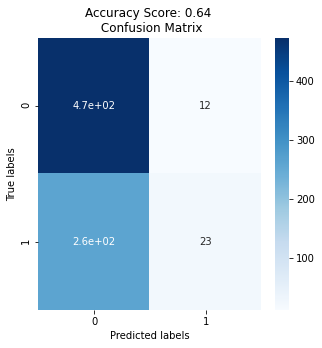

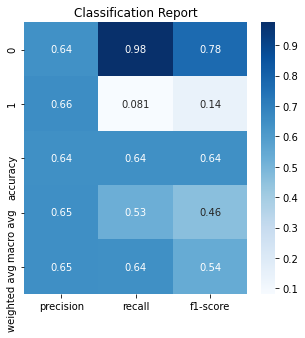

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

Hyper Parameter Tunning using Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
svc = svm.SVC()

# Create the random grid
random_grid = {'C': [1,10,100], 
              'kernel': ['linear','rbf']}
              
rf_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_w2v, ytrain)
print(rf_random.best_params_)
prediction = rf_random.predict(xvalid_w2v) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM(word2vec) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   25.2s finished


{'kernel': 'linear', 'C': 10}
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       484
           1       0.62      0.04      0.07       285

    accuracy                           0.63       769
   macro avg       0.63      0.51      0.42       769
weighted avg       0.63      0.63      0.51       769

SVM(word2vec) after HT+RS, Accuracy Score: 0.6345903771131339


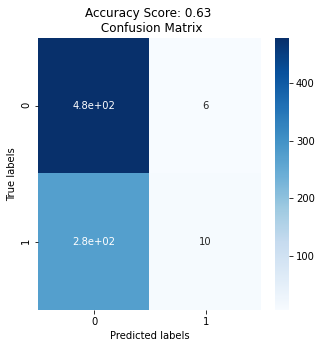

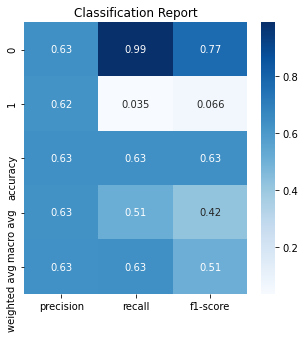

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score =rf_random.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

1.2 SVM-RBF (Doc2Vec)

In [ ]:
svc = svm.SVC(kernel='rbf', C=1).fit(xtrain_d2v, ytrain) 
prediction = svc.predict(xvalid_d2v) 

#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM-RBF(doc2vec), Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.64      0.95      0.77       484
           1       0.55      0.10      0.17       285

    accuracy                           0.64       769
   macro avg       0.60      0.53      0.47       769
weighted avg       0.61      0.64      0.54       769

SVM-RBF(doc2vec), Accuracy Score: 0.635890767230169


HyperParameter Tunning using Grid Search

In [ ]:
parameters = [{'C': [1,10,50,100], 'kernel': ['linear','rbf']}]
grid_search = GridSearchCV(estimator= svc,
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(xtrain_d2v, ytrain)
grid_search.best_params_
prediction = grid_search.predict(xvalid_d2v) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)


print("SVM_RBF(doc2vec) after HT+GS, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.64      0.95      0.77       484
           1       0.55      0.10      0.17       285

    accuracy                           0.64       769
   macro avg       0.60      0.53      0.47       769
weighted avg       0.61      0.64      0.54       769

SVM_RBF(doc2vec) after HT+GS, Accuracy Score: 0.635890767230169


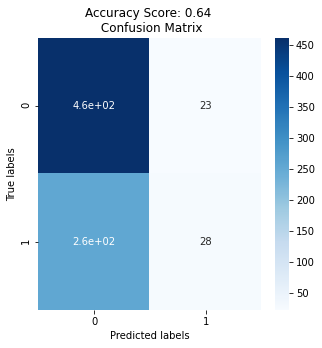

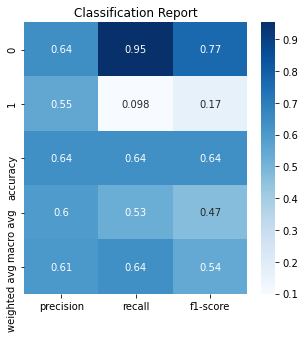

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_d2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

HyperParameter Tunning using Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#svc = svm.SVC()

# Create the random grid
random_grid = {'C': [0.1,1,10,100], 
              'kernel': ['linear','rbf']}
              
rf_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_d2v, ytrain)
print("best Params")
print(rf_random.best_params_)


prediction = rf_random.predict(xvalid_d2v) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)


print("SVM_RBF(doc2vec) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   33.0s finished


best Params
{'kernel': 'rbf', 'C': 1}
              precision    recall  f1-score   support

           0       0.64      0.95      0.77       484
           1       0.55      0.10      0.17       285

    accuracy                           0.64       769
   macro avg       0.60      0.53      0.47       769
weighted avg       0.61      0.64      0.54       769

SVM_RBF(doc2vec) after HT+RS, Accuracy Score: 0.635890767230169


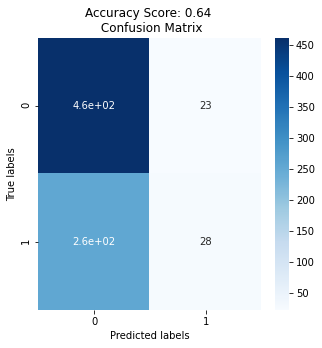

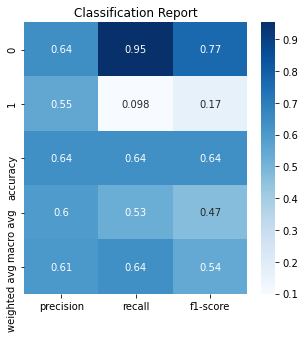

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_d2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

1.3 SVM(BOW)

HyperParameter Tunning using Grid Search

In [ ]:
svc = svm.SVC()
parameters = [{'C': [1,10,50,100], 'kernel': ['linear','rbf']}]
grid_search = GridSearchCV(estimator= svc,
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(xtrain_bow, ytrain)
grid_search.best_params_
prediction = grid_search.predict(xvalid_bow) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)


print("SVM_RBF(BOW) after HT+GS, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.66      0.94      0.78       484
           1       0.64      0.18      0.28       285

    accuracy                           0.66       769
   macro avg       0.65      0.56      0.53       769
weighted avg       0.65      0.66      0.59       769

SVM_RBF(BOW) after HT+GS, Accuracy Score: 0.657997399219766


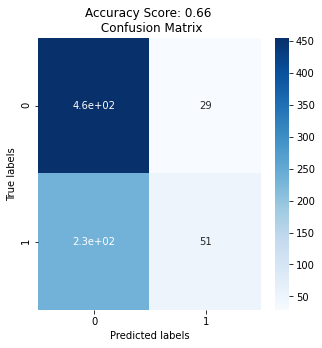

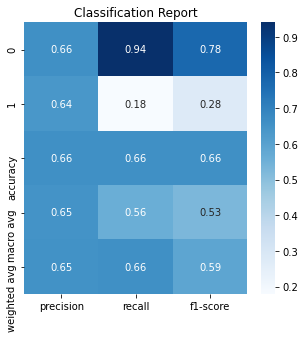

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_bow, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

HyperParameter Tunning using Random Search

In [ ]:
svc = svm.SVC()

# Create the random grid
random_grid = {'C': [1,10,100], 
              'kernel': ['linear','rbf']}
              
rf_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_bow, ytrain)
print(rf_random.best_params_)
prediction = rf_random.predict(xvalid_bow) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM(bow) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   51.8s finished


{'kernel': 'rbf', 'C': 1}
              precision    recall  f1-score   support

           0       0.66      0.94      0.78       484
           1       0.64      0.18      0.28       285

    accuracy                           0.66       769
   macro avg       0.65      0.56      0.53       769
weighted avg       0.65      0.66      0.59       769

SVM(bow) after HT+RS, Accuracy Score: 0.657997399219766


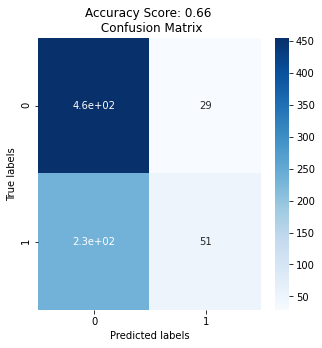

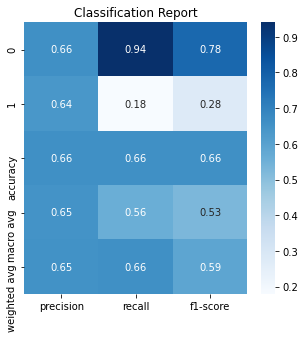

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_bow, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

1.4 SVM(TF-IDF)

HyperParameter Tunning using Grid Search

In [ ]:
parameters = [{'C': [1,10,50,100], 'kernel': ['linear','rbf']}]
grid_search = GridSearchCV(estimator= svc,
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(xtrain_tfidf, ytrain)
grid_search.best_params_
prediction = grid_search.predict(xvalid_tfidf) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)


print("SVM_RBF(tfidf) after HT+GS, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       484
           1       0.58      0.18      0.27       285

    accuracy                           0.65       769
   macro avg       0.62      0.55      0.52       769
weighted avg       0.63      0.65      0.58       769

SVM_RBF(tfidf) after HT+GS, Accuracy Score: 0.647594278283485


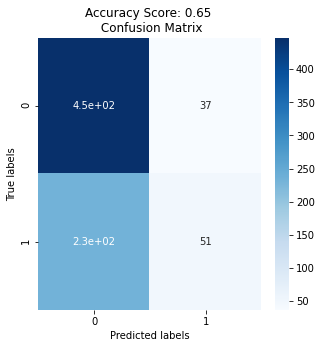

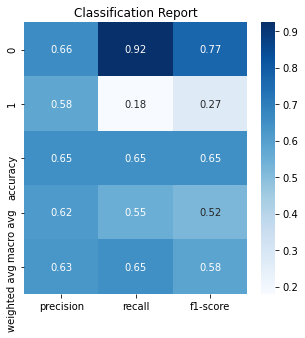

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_tfidf, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

HyperParameter Tunning using Random Search

In [ ]:
svc = svm.SVC()

# Create the random grid
random_grid = {'C': [1,10,100], 
              'kernel': ['linear','rbf']}
              
rf_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_tfidf, ytrain)
print(rf_random.best_params_)
prediction = rf_random.predict(xvalid_tfidf) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM(tfidf) after HT+RS, Accuracy Score:",acc1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   14.4s finished


{'kernel': 'rbf', 'C': 1}
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       484
           1       0.58      0.18      0.27       285

    accuracy                           0.65       769
   macro avg       0.62      0.55      0.52       769
weighted avg       0.63      0.65      0.58       769

SVM(tfidf) after HT+RS, Accuracy Score: 0.647594278283485


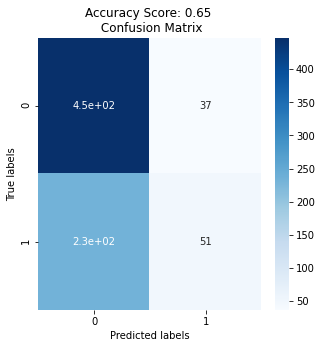

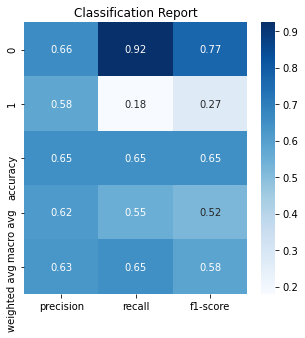

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_tfidf, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

1.5 SVM(fasttext)

HyperParameter Tunning using Random Search

HyperParameter Tunning using GridSearch

2.1 RF(Word2Vec)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v)


#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(word2vec), Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       484
           1       0.64      0.16      0.26       285

    accuracy                           0.66       769
   macro avg       0.65      0.55      0.52       769
weighted avg       0.65      0.66      0.58       769

RF(word2vec), Accuracy Score: 0.6553966189856957


Hyperparameter Tunning using Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_w2v, ytrain)

print("best Params")
print(rf_random.best_params_)

prediction = rf_random.predict(xvalid_w2v)

#classifiction Report
report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(word2vec) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 60.0min finished


best Params
{'n_estimators': 767, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 36, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.65      0.95      0.77       484
           1       0.60      0.14      0.22       285

    accuracy                           0.65       769
   macro avg       0.63      0.54      0.50       769
weighted avg       0.63      0.65      0.57       769

RF(word2vec) after HT+RS, Accuracy Score: 0.64629388816645


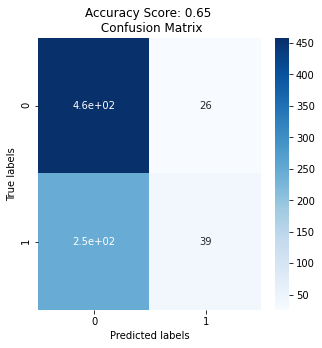

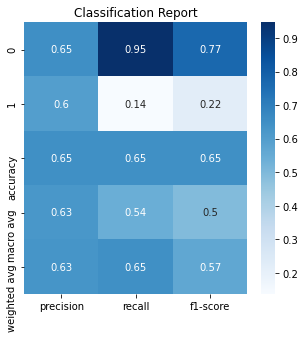

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

Hyperparameter Tunning using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(xtrain_w2v, ytrain)

print("best Params")
print(grid_search.best_params_)

prediction = grid_search.predict(xvalid_w2v)

#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(word2vec) after HT+GS, Accuracy Score:",acc1)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 24.9min finished


best Params
{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.65      0.95      0.77       484
           1       0.62      0.13      0.21       285

    accuracy                           0.65       769
   macro avg       0.64      0.54      0.49       769
weighted avg       0.64      0.65      0.56       769

RF(word2vec) after HT+GS, Accuracy Score: 0.647594278283485


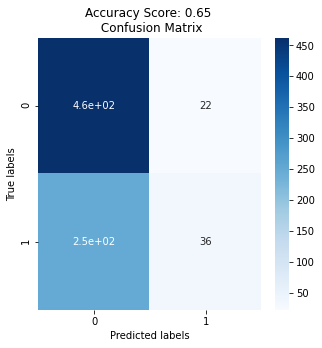

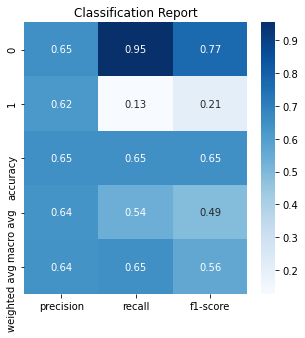

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

2.2 RF(Doc2vec)

In [ ]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain) 
prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)
#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(doc2vec), Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       484
           1       0.54      0.21      0.30       285

    accuracy                           0.64       769
   macro avg       0.60      0.55      0.53       769
weighted avg       0.61      0.64      0.59       769

RF(doc2vec), Accuracy Score: 0.6410923276983095


Hyperparameter Tunning using RandomSearch 

In [ ]:
rf = RandomForestClassifier()
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_d2v, ytrain)

print("best Params")
print(rf_random.best_params_)

prediction = rf_random.predict(xvalid_d2v)

#classifiction Report
report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(Doc2vec) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 68.1min finished


best Params
{'n_estimators': 964, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 27, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       484
           1       0.55      0.17      0.26       285

    accuracy                           0.64       769
   macro avg       0.60      0.54      0.51       769
weighted avg       0.61      0.64      0.58       769

RF(Doc2vec) after HT+RS, Accuracy Score: 0.6410923276983095


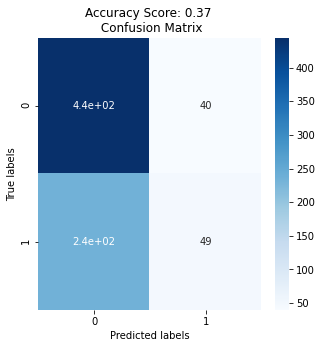

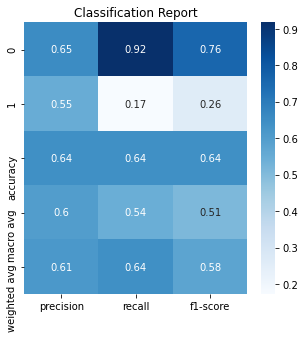

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

Hyperparameter Tunning using GridSearch 

In [ ]:
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 50, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(xtrain_d2v, ytrain)
print(grid_search.best_params_)
prediction = grid_search.predict(xvalid_d2v)

#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(doc2vec) after HT+GD, Accuracy Score:",acc1)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 24.3min finished


{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       484
           1       0.55      0.16      0.25       285

    accuracy                           0.64       769
   macro avg       0.60      0.54      0.51       769
weighted avg       0.61      0.64      0.57       769

RF(doc2vec) after HT+GD, Accuracy Score: 0.6397919375812744


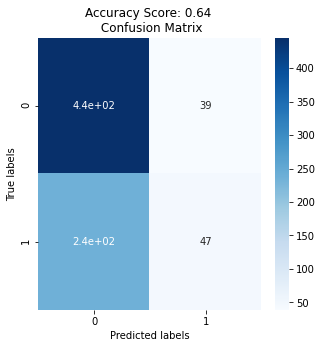

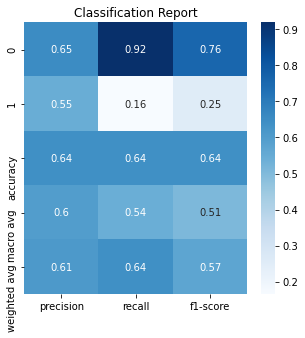

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_d2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

2.3 RF(BOW)

Hyperparameter Tunning using GridSearch 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 50, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(xtrain_bow, ytrain)
print(grid_search.best_params_)
prediction = grid_search.predict(xvalid_bow)

#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(Bow) after HT+GD, Accuracy Score:",acc1)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.7min


{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       484
           1       1.00      0.01      0.01       285

    accuracy                           0.63       769
   macro avg       0.82      0.50      0.39       769
weighted avg       0.77      0.63      0.49       769

RF(Bow) after HT+GD, Accuracy Score: 0.6319895968790638


[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.7min finished


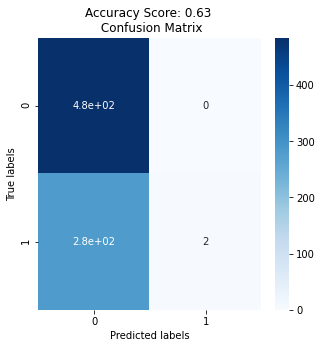

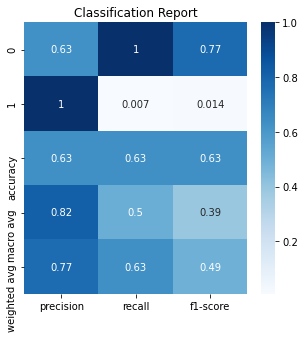

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_bow, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

Hyperparameter Tunning using RandomSearch 

In [ ]:
rf = RandomForestClassifier()
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_bow, ytrain)

print("best Params")
print(rf_random.best_params_)

prediction = rf_random.predict(xvalid_bow)

#classifiction Report
report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(bow) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.2min finished


best Params
{'n_estimators': 656, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.68      0.90      0.78       484
           1       0.64      0.29      0.40       285

    accuracy                           0.68       769
   macro avg       0.66      0.60      0.59       769
weighted avg       0.67      0.68      0.64       769

RF(bow) after HT+RS, Accuracy Score: 0.6775032509752926


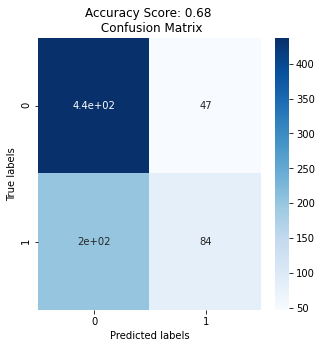

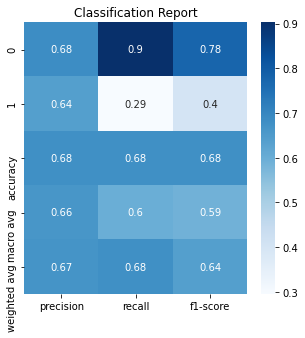

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_bow, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

2.4 RF(TF-IDF)

Hyperparameter Tunning using GridSearch 

In [ ]:
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 50, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(xtrain_tfidf, ytrain)
print(grid_search.best_params_)
prediction = grid_search.predict(xvalid_tfidf)

#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(tfidf) after HT+GD, Accuracy Score:",acc1)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.9min finished


{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       484
           1       0.75      0.01      0.02       285

    accuracy                           0.63       769
   macro avg       0.69      0.50      0.40       769
weighted avg       0.68      0.63      0.49       769

RF(tfidf) after HT+GD, Accuracy Score: 0.6319895968790638


Hyperparameter Tunning using RandomSearch 

In [ ]:
rf = RandomForestClassifier()
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_tfidf, ytrain)

print("best Params")
print(rf_random.best_params_)

prediction = rf_random.predict(xvalid_tfidf)

#classifiction Report
report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(tfidf) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.4min finished


best Params
{'n_estimators': 934, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 41, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.66      0.96      0.78       484
           1       0.68      0.15      0.24       285

    accuracy                           0.66       769
   macro avg       0.67      0.55      0.51       769
weighted avg       0.66      0.66      0.58       769

RF(tfidf) after HT+RS, Accuracy Score: 0.657997399219766


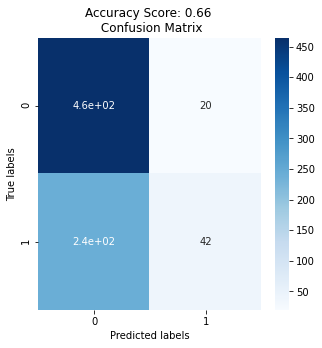

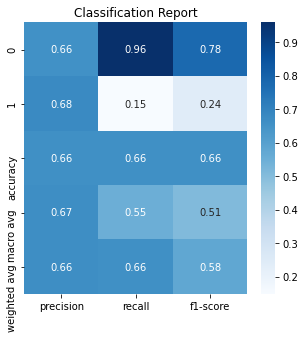

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_tfidf, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

2.5 RF(fasttext)

HyperParameter Tunning Using Random Search

3.1 LSTM(Word2Vec)

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Flatten
from keras.models import Sequential
model = Sequential()
model.add(Embedding(200, 50, input_length = xtrain_w2v.shape[1]))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 50)           10000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 70,501
Trainable params: 70,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size=32
model.fit(xtrain_w2v, ytrain, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
97/97 [==============================] - 42s 385ms/step - loss: 0.0000e+00 - accuracy: 0.3563
Epoch 2/5
97/97 [==============================] - 37s 385ms/step - loss: 0.0000e+00 - accuracy: 0.3570
Epoch 3/5
97/97 [==============================] - 37s 385ms/step - loss: 0.0000e+00 - accuracy: 0.3569
Epoch 4/5
97/97 [==============================] - 36s 369ms/step - loss: 0.0000e+00 - accuracy: 0.3553
Epoch 5/5
97/97 [==============================] - 36s 375ms/step - loss: 0.0000e+00 - accuracy: 0.3552


In [ ]:

prediction = model.predict(xvalid_w2v)

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("LSTM(word2vec), Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       484
           1       0.37      1.00      0.54       285

    accuracy                           0.37       769
   macro avg       0.19      0.50      0.27       769
weighted avg       0.14      0.37      0.20       769

LSTM(word2vec), Accuracy Score: 0.3706111833550065


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def build_model(var_activation='relu',var_optimizer='adam'):
  model = Sequential()
  model.add(Embedding(300, 150, input_length = xtrain_w2v.shape[1]))
  model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
  model.add(Flatten())
  model.add(Dense(60,activation=var_activation))
  model.add(Dense(5,activation=var_activation))
  model.add(Dense(1,activation='softmax'))
  model.compile(loss="binary_crossentropy",
                optimizer=var_optimizer,
                metrics=["accuracy"])
  return model
model_default = build_model()
model_default.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 150)          45000     
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               100400    
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 305       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 151,771
Trainable params: 151,771
Non-trainable params: 0
________________________________________________

In [ ]:
_activations=['tanh','relu','selu']
_optimizers=['sgd','adam']
_batch_size=[16,32,64]
params=dict(var_activation=_activations,
            var_optimizer=_optimizers,
            batch_size=_batch_size)
print(params)

{'var_activation': ['tanh', 'relu', 'selu'], 'var_optimizer': ['sgd', 'adam'], 'batch_size': [16, 32, 64]}


In [ ]:

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=build_model,epochs=4,batch_size=16)
np.random.seed(42)

In [ ]:
rscv = RandomizedSearchCV(model, param_distributions=params, cv=3, n_iter=10)
rscv_results = rscv.fit(xtrain_w2v,ytrain)
print('Best score is: {} using {}'.format(rscv_results.best_score_,
rscv_results.best_params_))

Epoch 1/4
129/129 [==============================] - 59s 412ms/step - loss: 0.6576 - accuracy: 0.3406
Epoch 2/4
129/129 [==============================] - 52s 404ms/step - loss: 0.6406 - accuracy: 0.3388
Epoch 3/4
129/129 [==============================] - 52s 400ms/step - loss: 0.6462 - accuracy: 0.3462
Epoch 4/4
65/65 [==============================] - 4s 45ms/step - loss: 0.6617 - accuracy: 0.3717
Epoch 1/4
129/129 [==============================] - 56s 400ms/step - loss: 0.6628 - accuracy: 0.3695
Epoch 2/4
129/129 [==============================] - 52s 399ms/step - loss: 0.6544 - accuracy: 0.3602
Epoch 3/4
129/129 [==============================] - 53s 411ms/step - loss: 0.6565 - accuracy: 0.3626
Epoch 4/4
65/65 [==============================] - 4s 43ms/step - loss: 0.6458 - accuracy: 0.3473
Epoch 1/4
129/129 [==============================] - 57s 410ms/step - loss: 0.6751 - accuracy: 0.3659
Epoch 2/4
129/129 [==============================] - 53s 408ms/step - loss: 0.6559 - accur

In [ ]:
prediction = rscv_results.predict(xvalid_w2v)

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)


print("LSTM(word2vec), Accuracy Score:",acc1)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       484
           1       0.37      1.00      0.54       285

    accuracy                           0.37       769
   macro avg       0.19      0.50      0.27       769
weighted avg       0.14      0.37      0.20       769

LSTM(word2vec), Accuracy Score: 0.3706111833550065


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 3s 44ms/step - loss: 0.6601 - accuracy: 0.3706


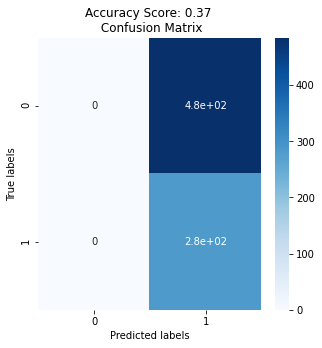

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


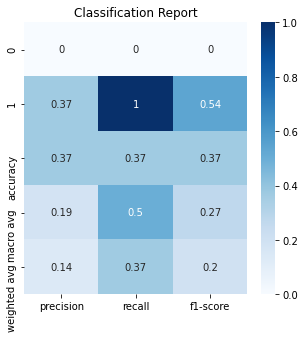

In [ ]:
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rscv_results.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

3.2 LSTM (doc2Vec)

In [47]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Flatten
from keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model = Sequential()
model.add(Embedding(500, 120, input_length = xtrain_d2v.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())
batch_size=32
model.fit(xtrain_d2v, ytrain, epochs = 10, batch_size=batch_size, verbose = 'auto')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 120)          60000     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 120)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 176)               209088    
_________________________________________________________________
dense (Dense)                (None, 1)                 177       
Total params: 269,265
Trainable params: 269,265
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
97/97 [==============================] - 102s 798ms/step - loss: 0.6517 - accuracy: 0.3421
Epoch 2/10
97/97 [==============================] - 77s 797ms/step - loss: 0.6547 - accuracy: 0.3580
Epoch 3/10
97/97 [======================

In [49]:
from sklearn.model_selection import RandomizedSearchCV
def build_model(var_activation='relu',var_optimizer='adam'):
  model = Sequential()
  model.add(Embedding(300, 150, input_length = xtrain_w2v.shape[1]))
  model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
  model.add(Flatten())
  model.add(Dense(60,activation=var_activation))
  model.add(Dense(5,activation=var_activation))
  model.add(Dense(1,activation='softmax'))
  model.compile(loss="binary_crossentropy",
                optimizer=var_optimizer,
                metrics=["accuracy"])
  return model
model_default = build_model()
_activations=['tanh','relu','selu']
_optimizers=['sgd','adam']
_batch_size=[16,32,64]
params=dict(var_activation=_activations,
            var_optimizer=_optimizers,
            batch_size=_batch_size)
print(params)

model = KerasClassifier(build_fn=build_model,epochs=5,batch_size=16)
np.random.seed(42)
rscv = RandomizedSearchCV(model, param_distributions=params, cv=3, n_iter=6)
rscv_results = rscv.fit(xtrain_d2v,ytrain)
print('Best score is: {} using {}'.format(rscv_results.best_score_,
rscv_results.best_params_))

{'var_activation': ['tanh', 'relu', 'selu'], 'var_optimizer': ['sgd', 'adam'], 'batch_size': [16, 32, 64]}
Epoch 1/5
129/129 [==============================] - 53s 379ms/step - loss: 0.6628 - accuracy: 0.3391
Epoch 2/5
129/129 [==============================] - 49s 378ms/step - loss: 0.6420 - accuracy: 0.3416
Epoch 3/5
129/129 [==============================] - 49s 382ms/step - loss: 0.6466 - accuracy: 0.3470
Epoch 4/5
129/129 [==============================] - 48s 375ms/step - loss: 0.6391 - accuracy: 0.3366
Epoch 5/5
65/65 [==============================] - 4s 39ms/step - loss: 0.6613 - accuracy: 0.3717
Epoch 1/5
129/129 [==============================] - 53s 380ms/step - loss: 0.6593 - accuracy: 0.3323
Epoch 2/5
129/129 [==============================] - 50s 384ms/step - loss: 0.6539 - accuracy: 0.3600
Epoch 3/5
129/129 [==============================] - 49s 382ms/step - loss: 0.6521 - accuracy: 0.3574
Epoch 4/5
129/129 [==============================] - 49s 378ms/step - loss: 0.648

In [50]:
prediction = rscv_results.predict(xvalid_d2v)

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)


print("LSTM(word2vec), Accuracy Score:",acc1)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       484
           1       0.37      1.00      0.54       285

    accuracy                           0.37       769
   macro avg       0.19      0.50      0.27       769
weighted avg       0.14      0.37      0.20       769

LSTM(word2vec), Accuracy Score: 0.3706111833550065


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 3s 39ms/step - loss: 0.6619 - accuracy: 0.3706


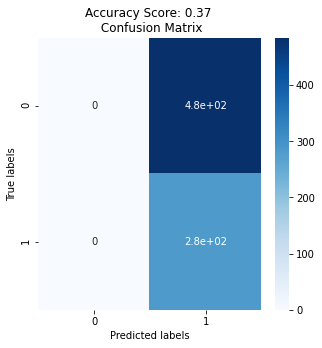

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


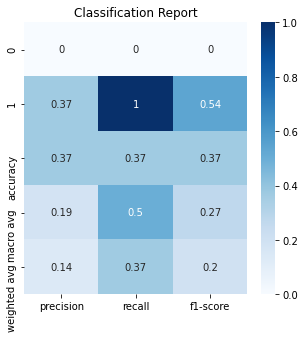

In [54]:
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rscv_results.score(xvalid_d2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

In [97]:
xtrain_bow=pd.DataFrame(xtrain_bow)
type(xtrain_bow)

pandas.core.frame.DataFrame

3.3 LSTM(bow)

3.4 LSTM(TFIDF)

3.5 LSTM(fsttext)